In [1]:
from epd_plot import *

In [2]:
# Path to the solo data files.
data_path = '/home/smurf/solo/data/'

# Path to where images and .csv -files will be saved.
image_path = '/home/smurf/srl/images/'
csv_path = '/home/smurf/srl/csv/'

In [3]:
# Start and end day. Format: yyyymmdd.
start_date = 20210522
end_date = 20210523

# Timestamps for the plotting parameters. Format: yyyy-mm-dd-hhhh.
plot_start = '2021-05-23-0300'
plot_end = '2021-05-23-0800'
search_start = '2021-05-23-0445'
search_end = '2021-05-23-0605'
bg_start = '2021-05-23-0415'
bg_end = '2021-05-23-0435'

# Averaging. 'mean' = rolling mean, 'none' = no averaging.
averaging_mode = 'mean'
averaging = 5

In [4]:
# Toggle individual instruments. For use if for example one instrument doesn't have data yet.
ept = True
het = True
step = True

# Toggles the step masking from Ninas function. No reason to be False.
step_masking = True

In [5]:
# Toggle saving of the images and .csv -files.
saving = False

--------------------

No corresponding data found at SOAR!


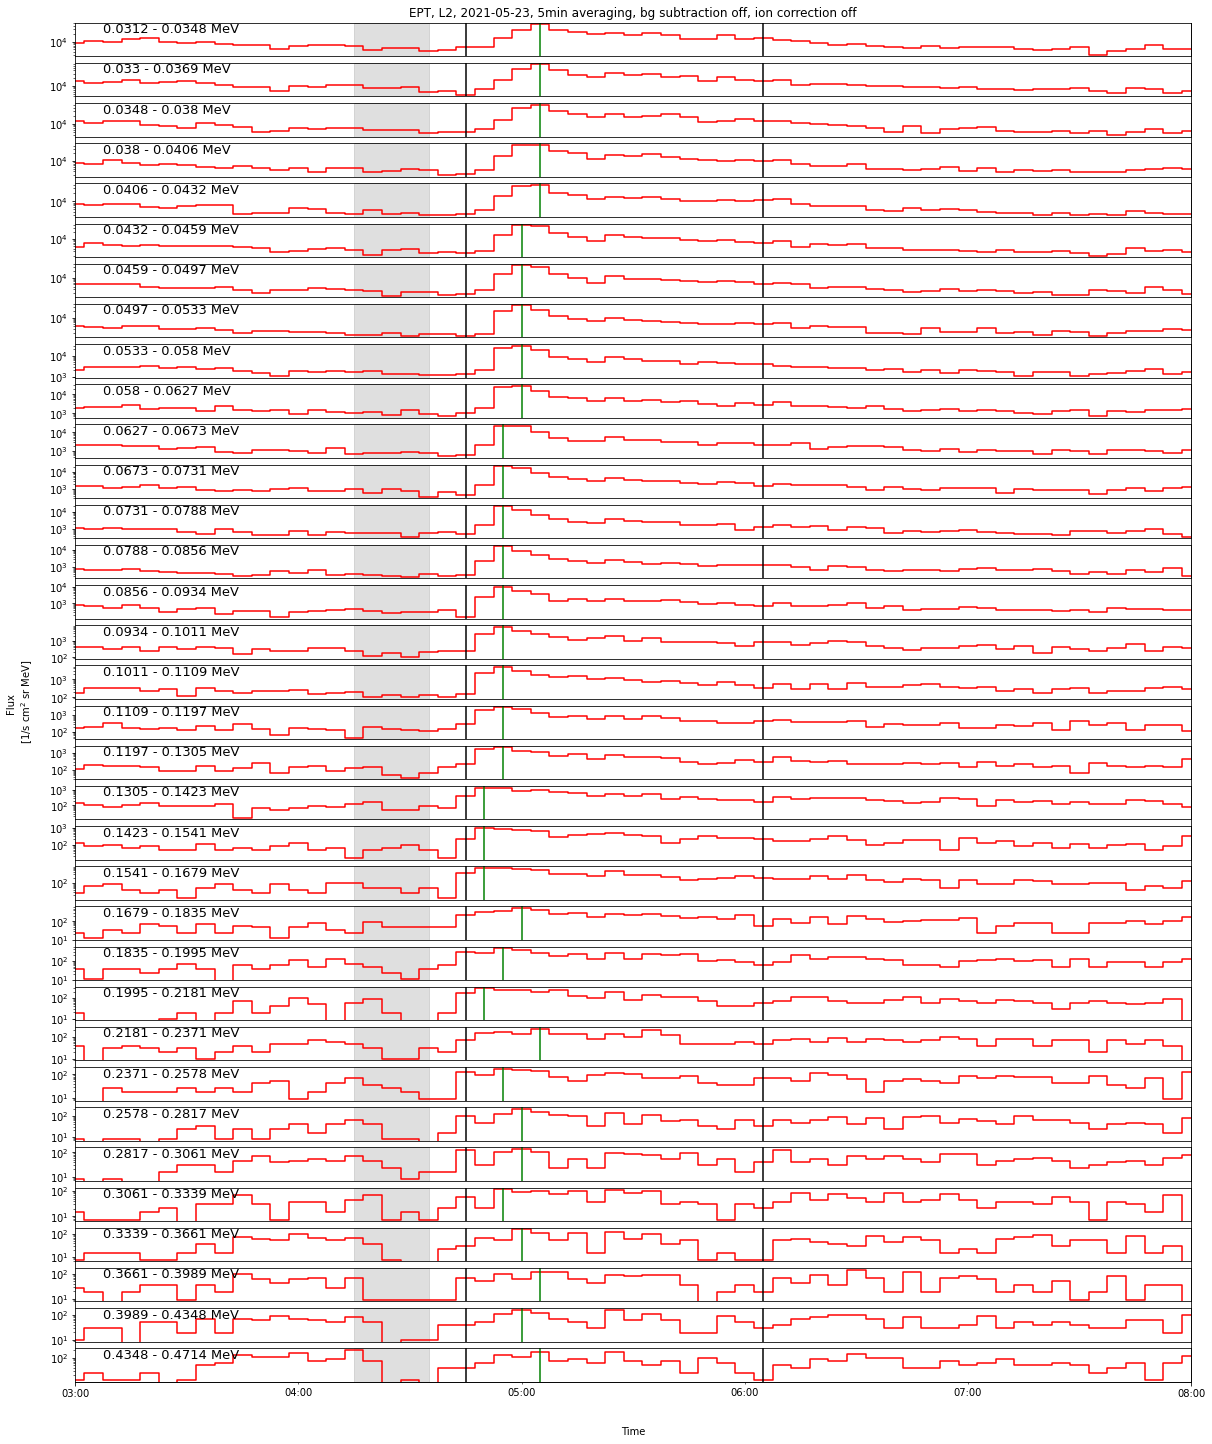

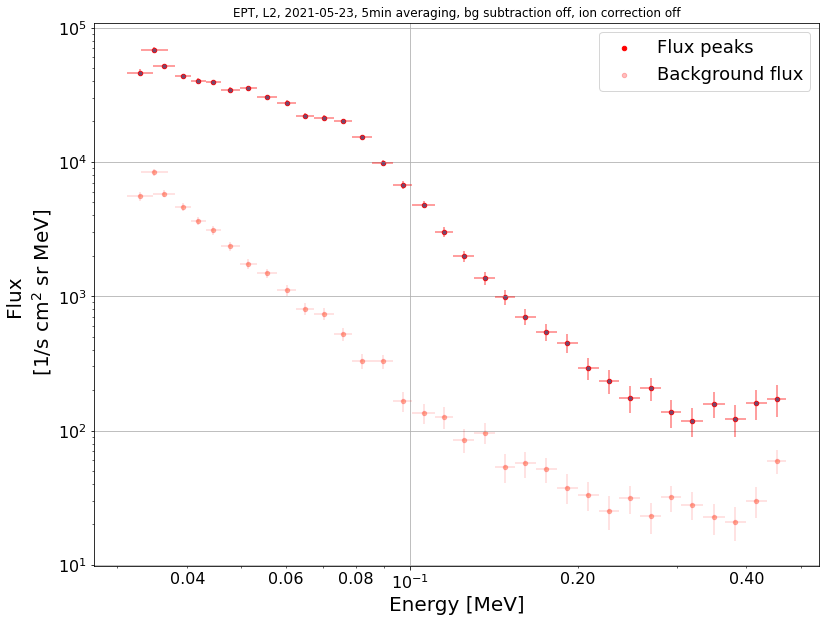

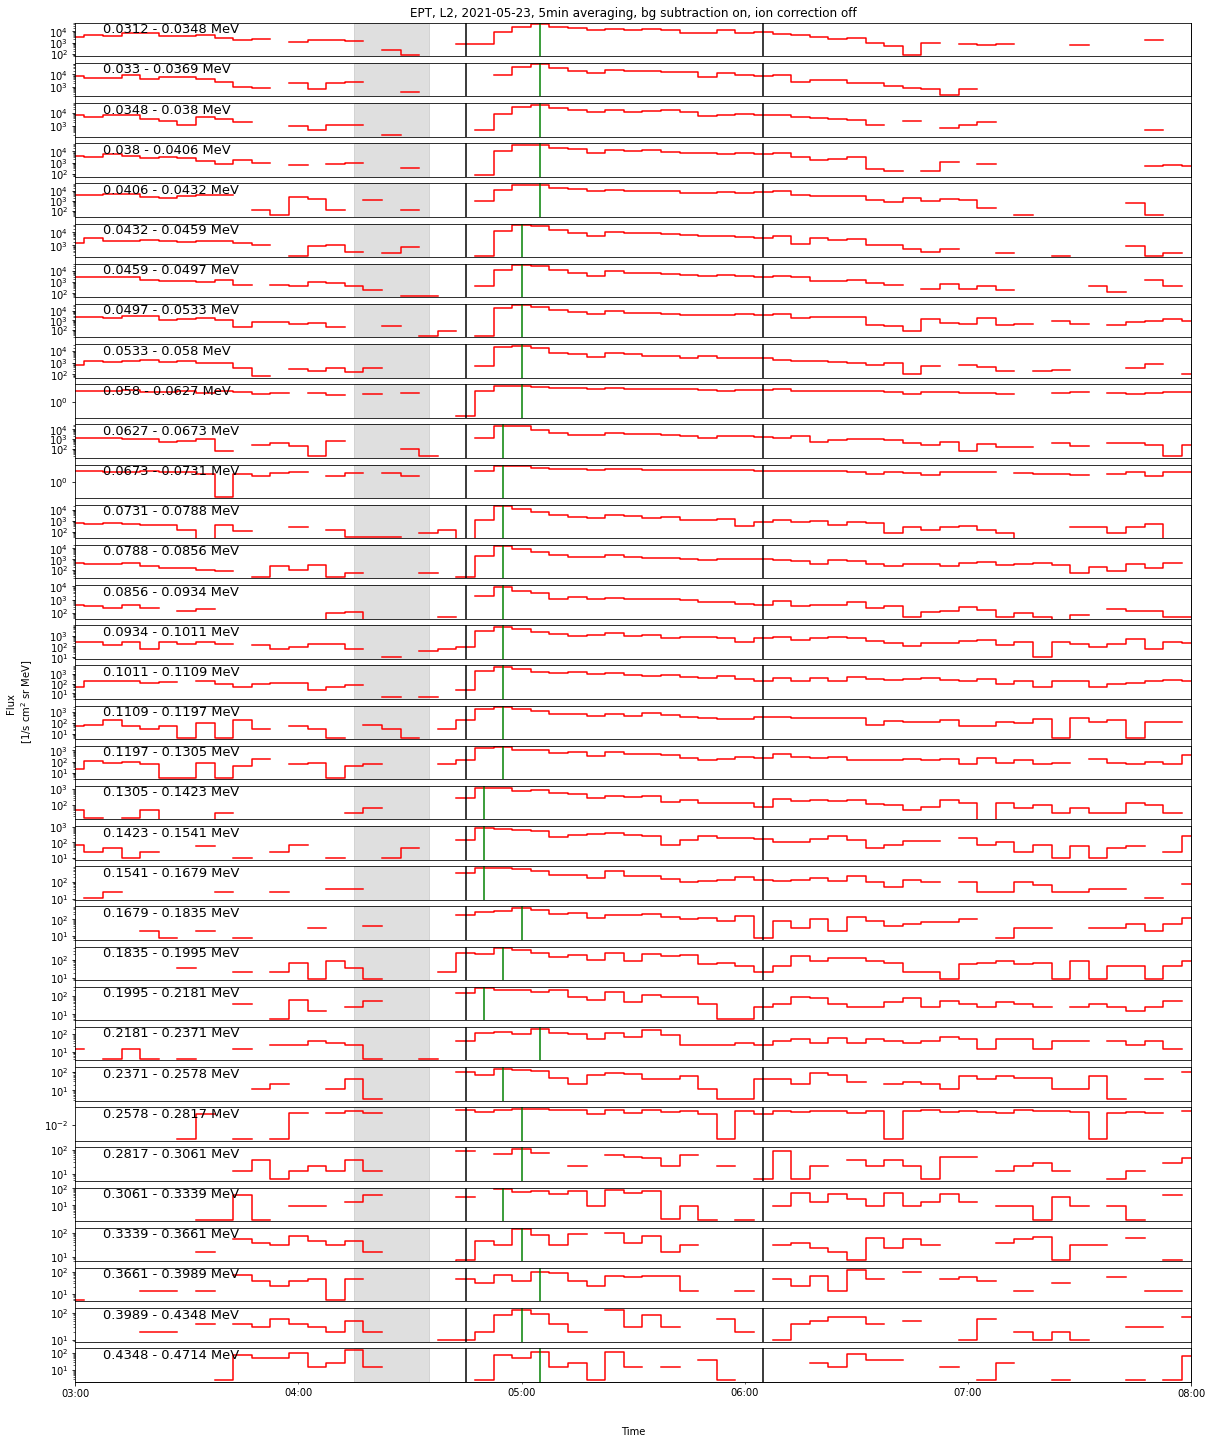

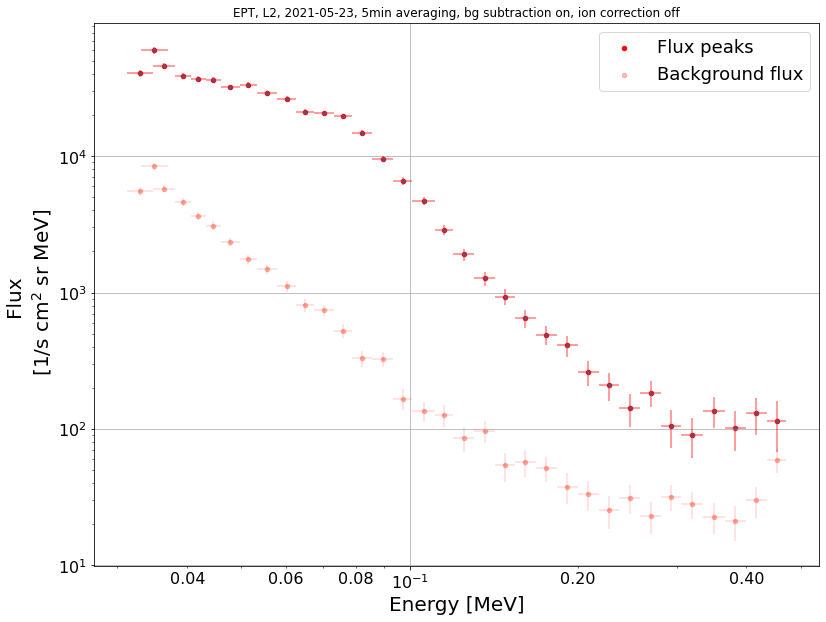

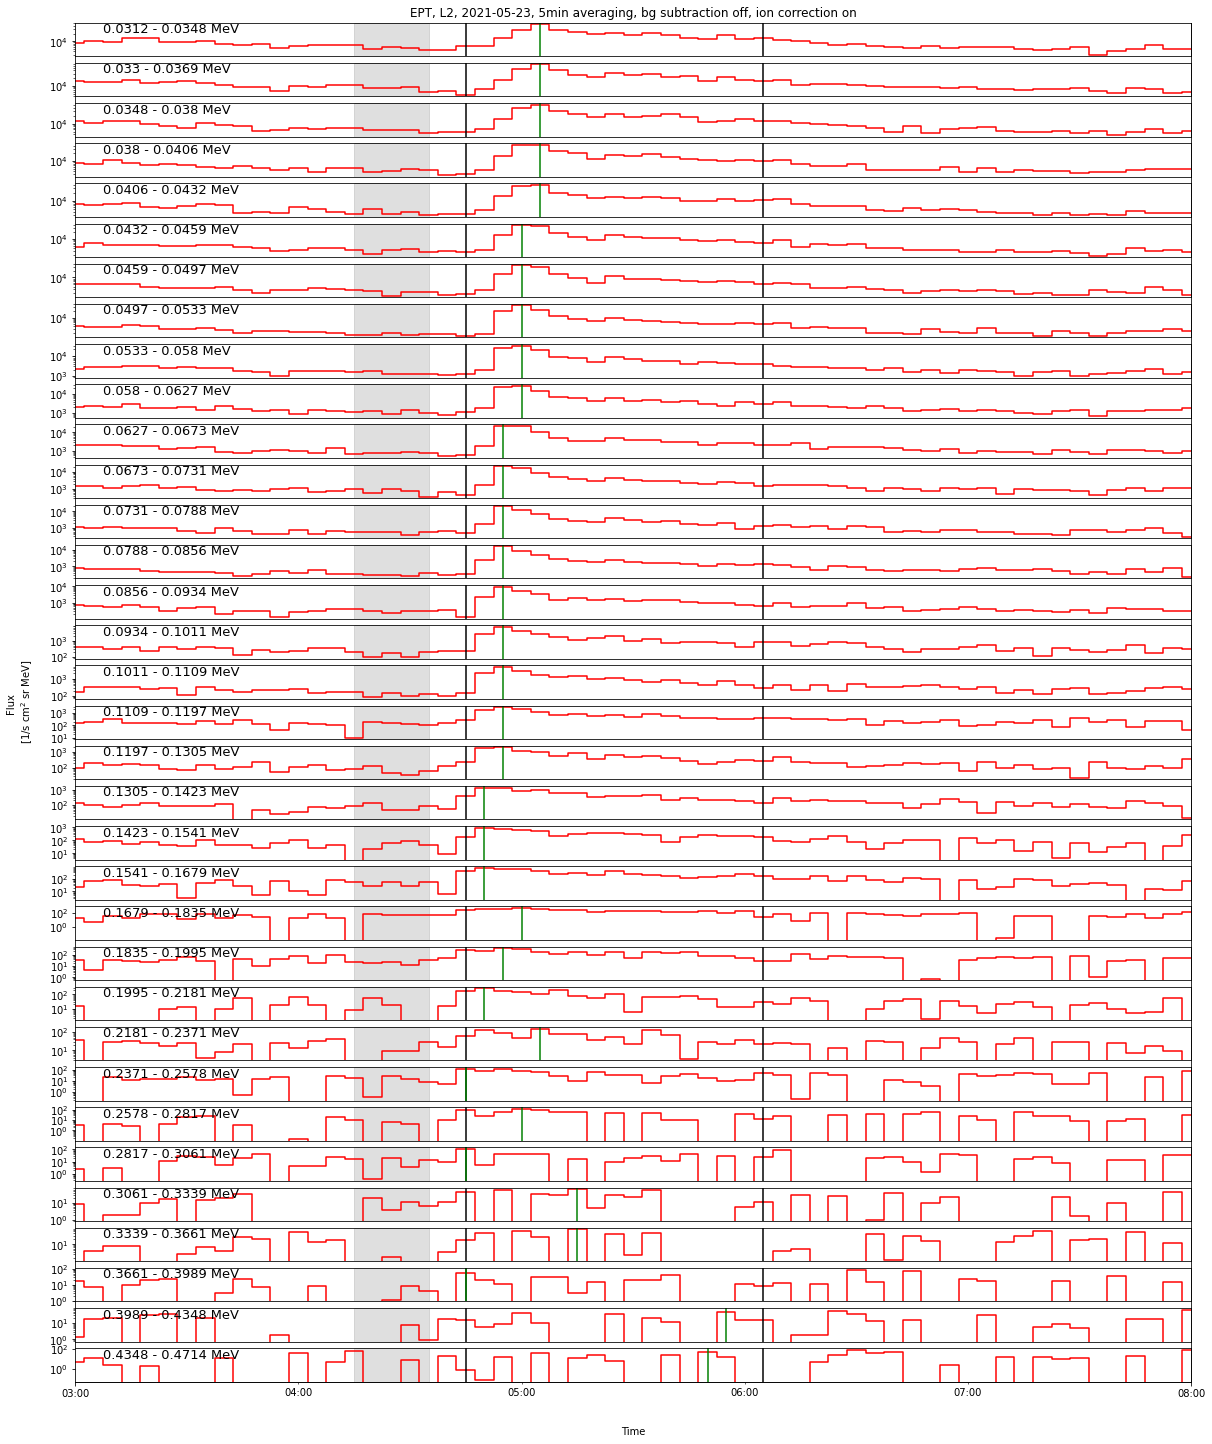

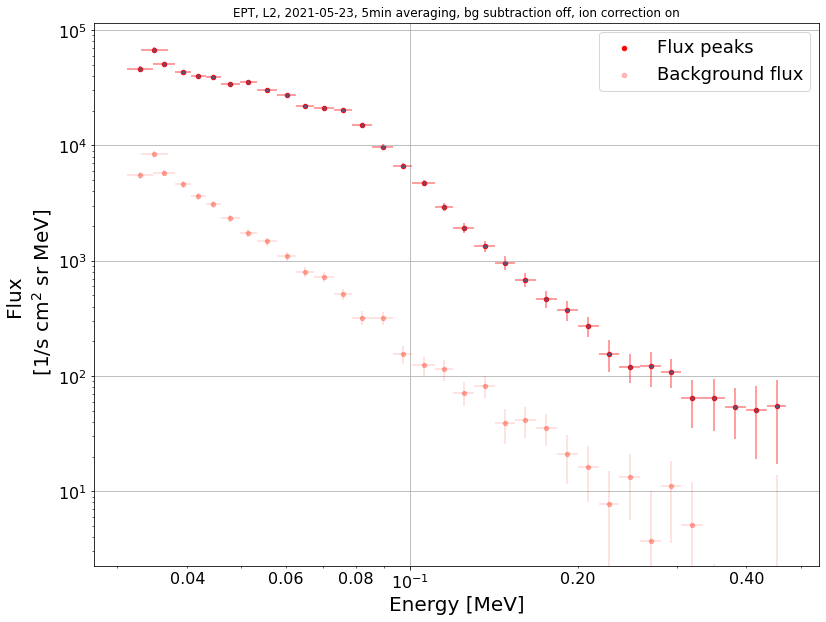

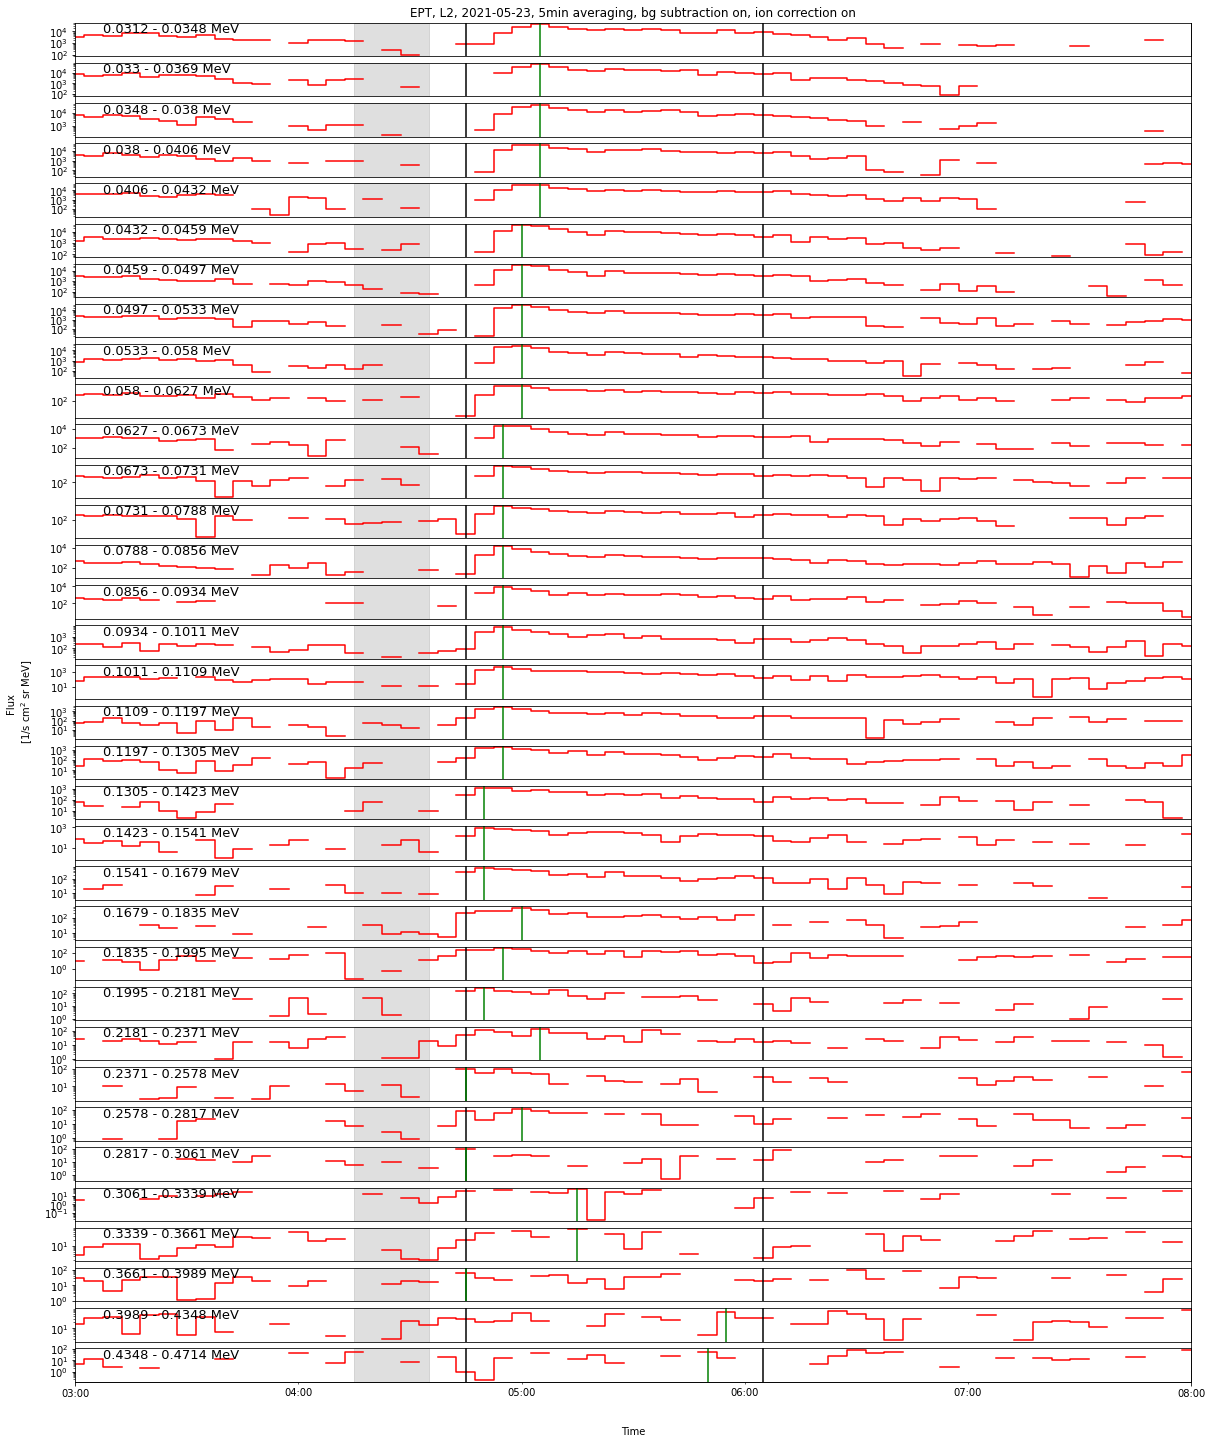

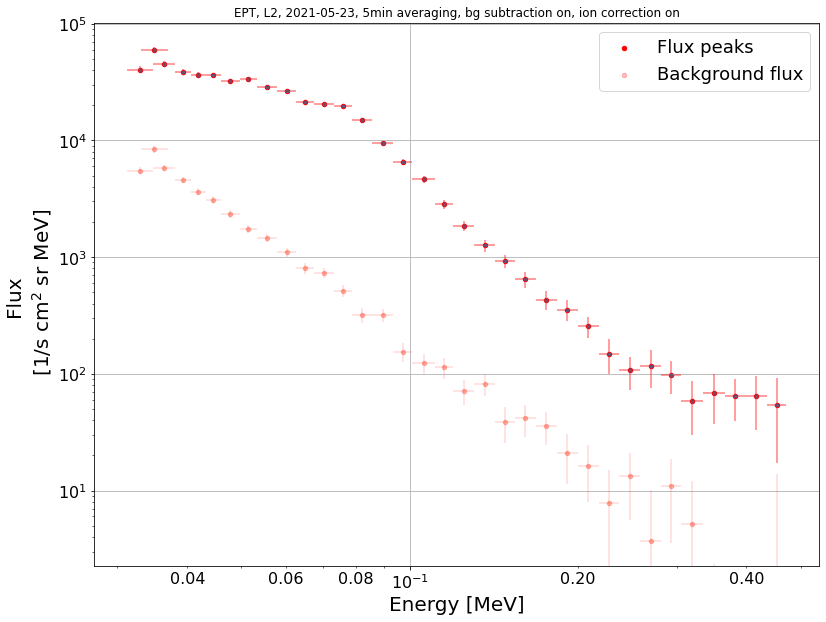

In [6]:
if(ept):
    df_protons_ept, df_electrons_ept, energies_ept = read_epd_cdf('ept', 'sun', 'l2', start_date, end_date, path=data_path, autodownload=True)
    for ion_b in [False, True]:
        data_ept = extract_data(df_protons_ept, df_electrons_ept, plot_start, plot_end, search_start, search_end, bg_start, bg_end, instrument='ept', data_type='l2', averaging_mode=averaging_mode, averaging=averaging, ion_conta_corr=ion_b)
        if saving: write_to_csv(data_ept, path=csv_path)
        for bg_b in [False, True]:
            plot_channels(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving)
            plot_spectrum(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving)      

No corresponding data found at SOAR!


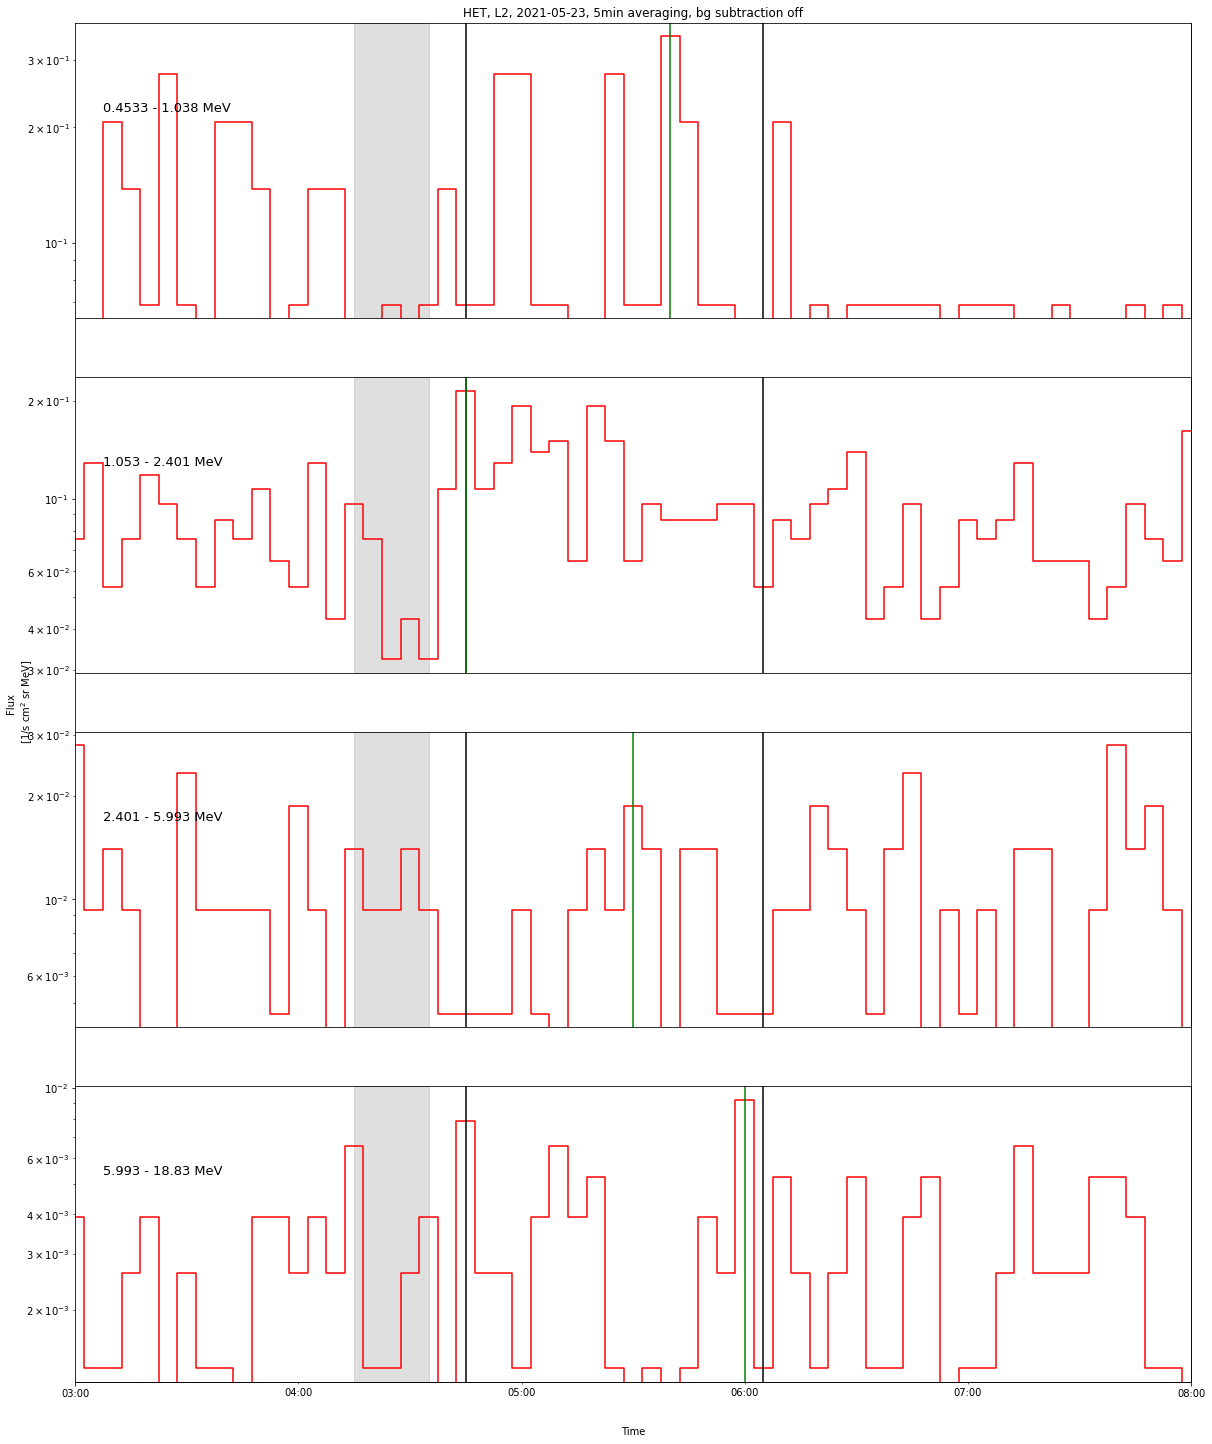

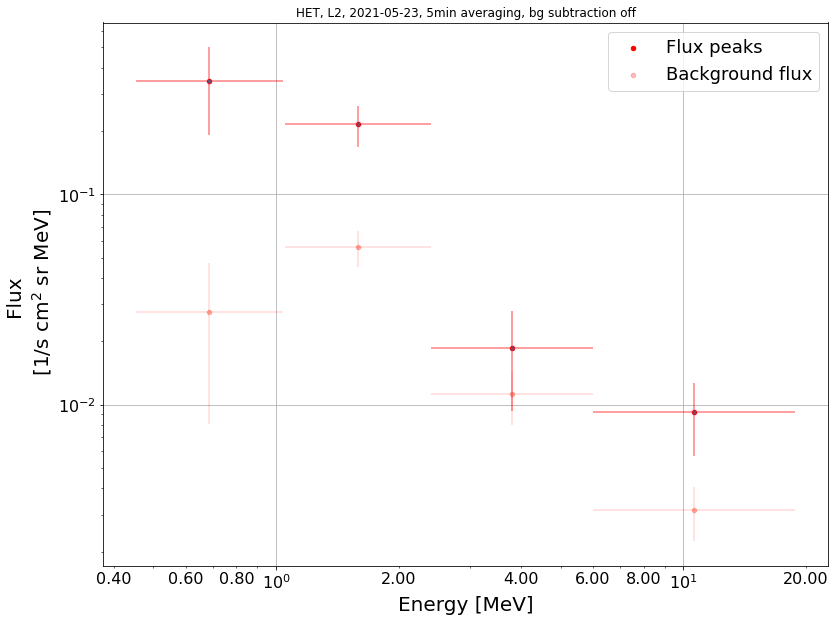

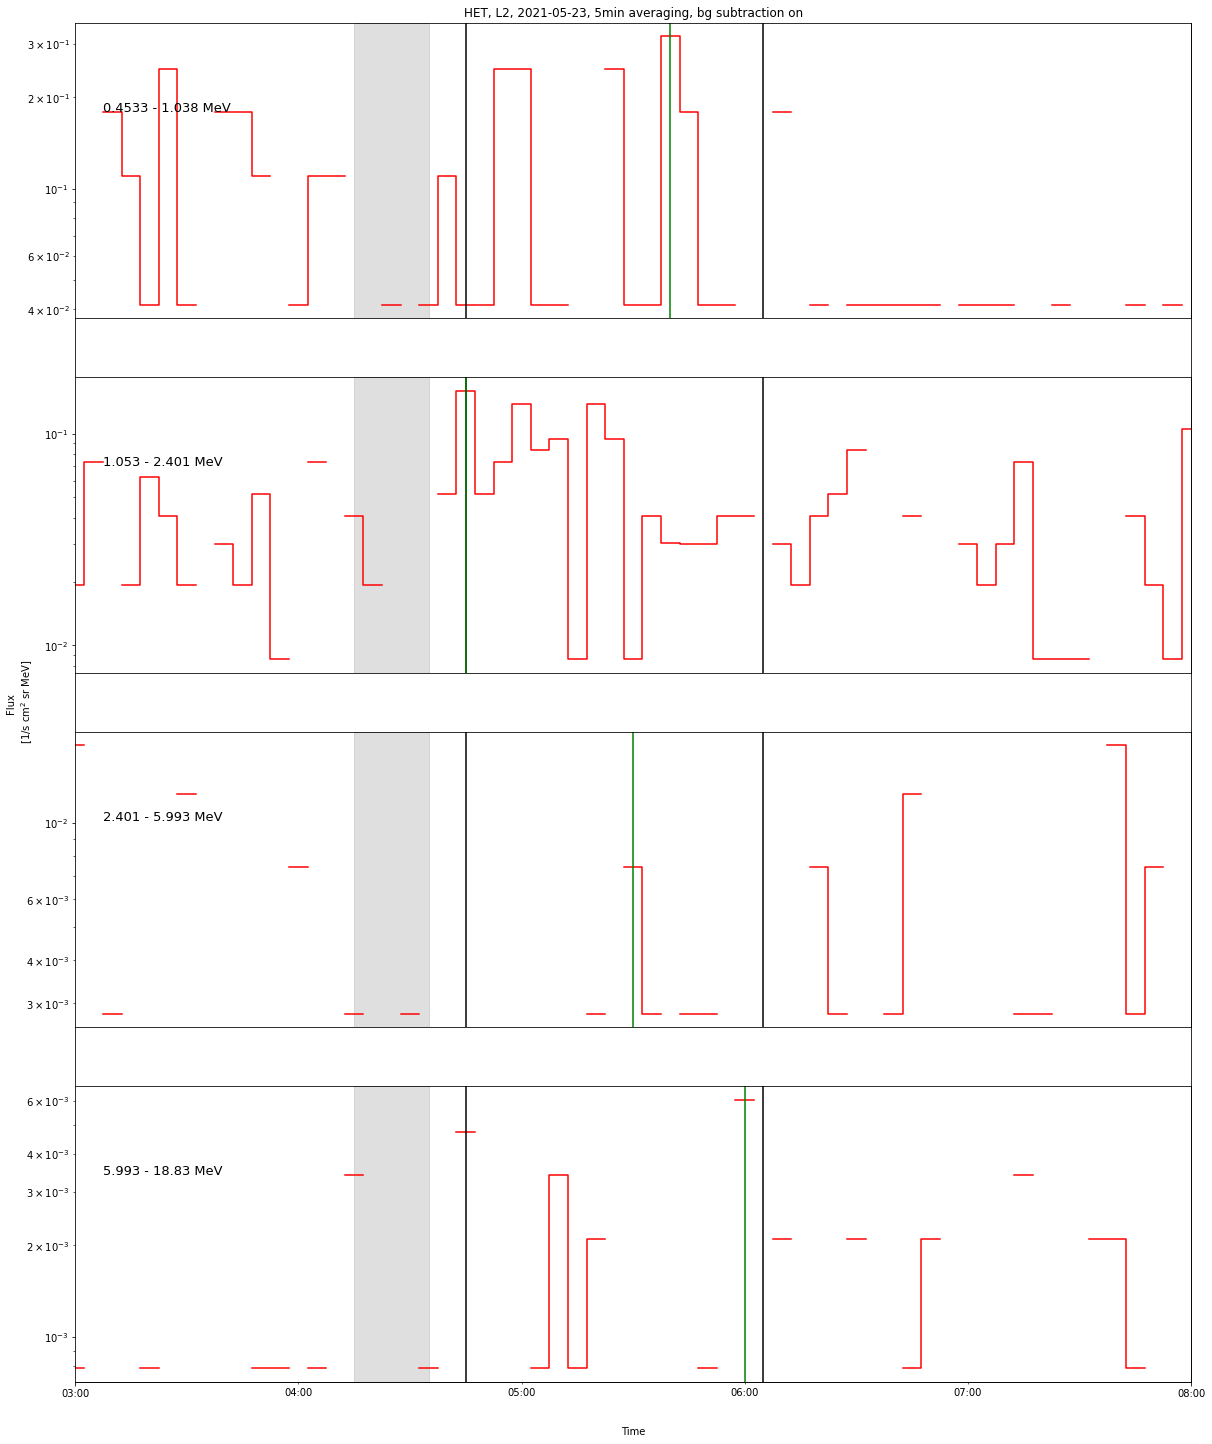

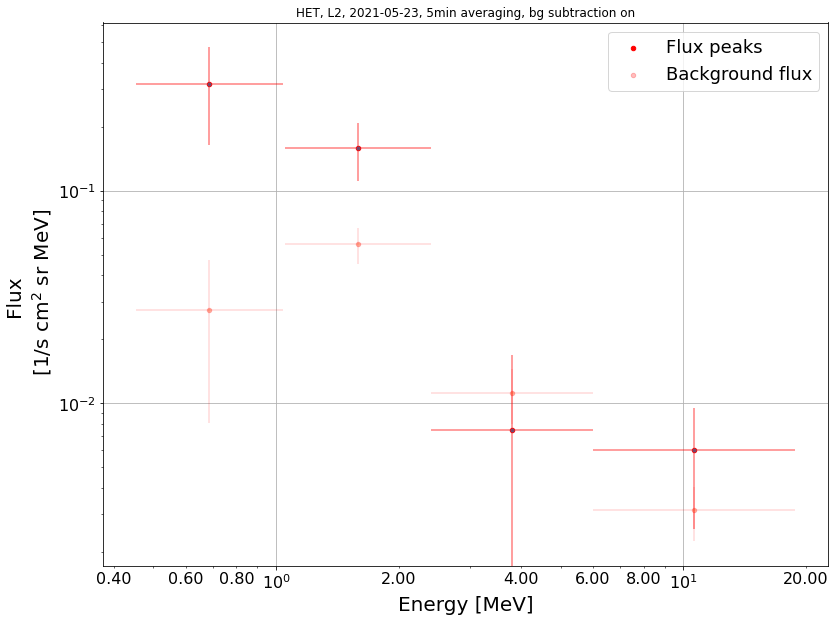

In [7]:
if(het):
    df_protons_het, df_electrons_het, energies_het = read_epd_cdf('het', 'sun', 'l2', start_date, end_date, path=data_path, autodownload=True)
    data_het = extract_data(df_protons_het, df_electrons_het, plot_start, plot_end, search_start, search_end, bg_start, bg_end, instrument='het', data_type='l2', averaging_mode=averaging_mode, averaging=averaging)
    if saving: write_to_csv(data_het, path=csv_path)
    for bg_b in [False, True]:
        plot_channels(data_het, bg_subtraction=bg_b, path=image_path, savefig=saving)
        plot_spectrum(data_het, bg_subtraction=bg_b, path=image_path, savefig=saving)

No corresponding data found at SOAR!


/home/smurf/srl/git/epd_plot.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electron_fluxes[df_electron_fluxes<0] = np.NaN
/home/smurf/.local/lib/python3.8/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


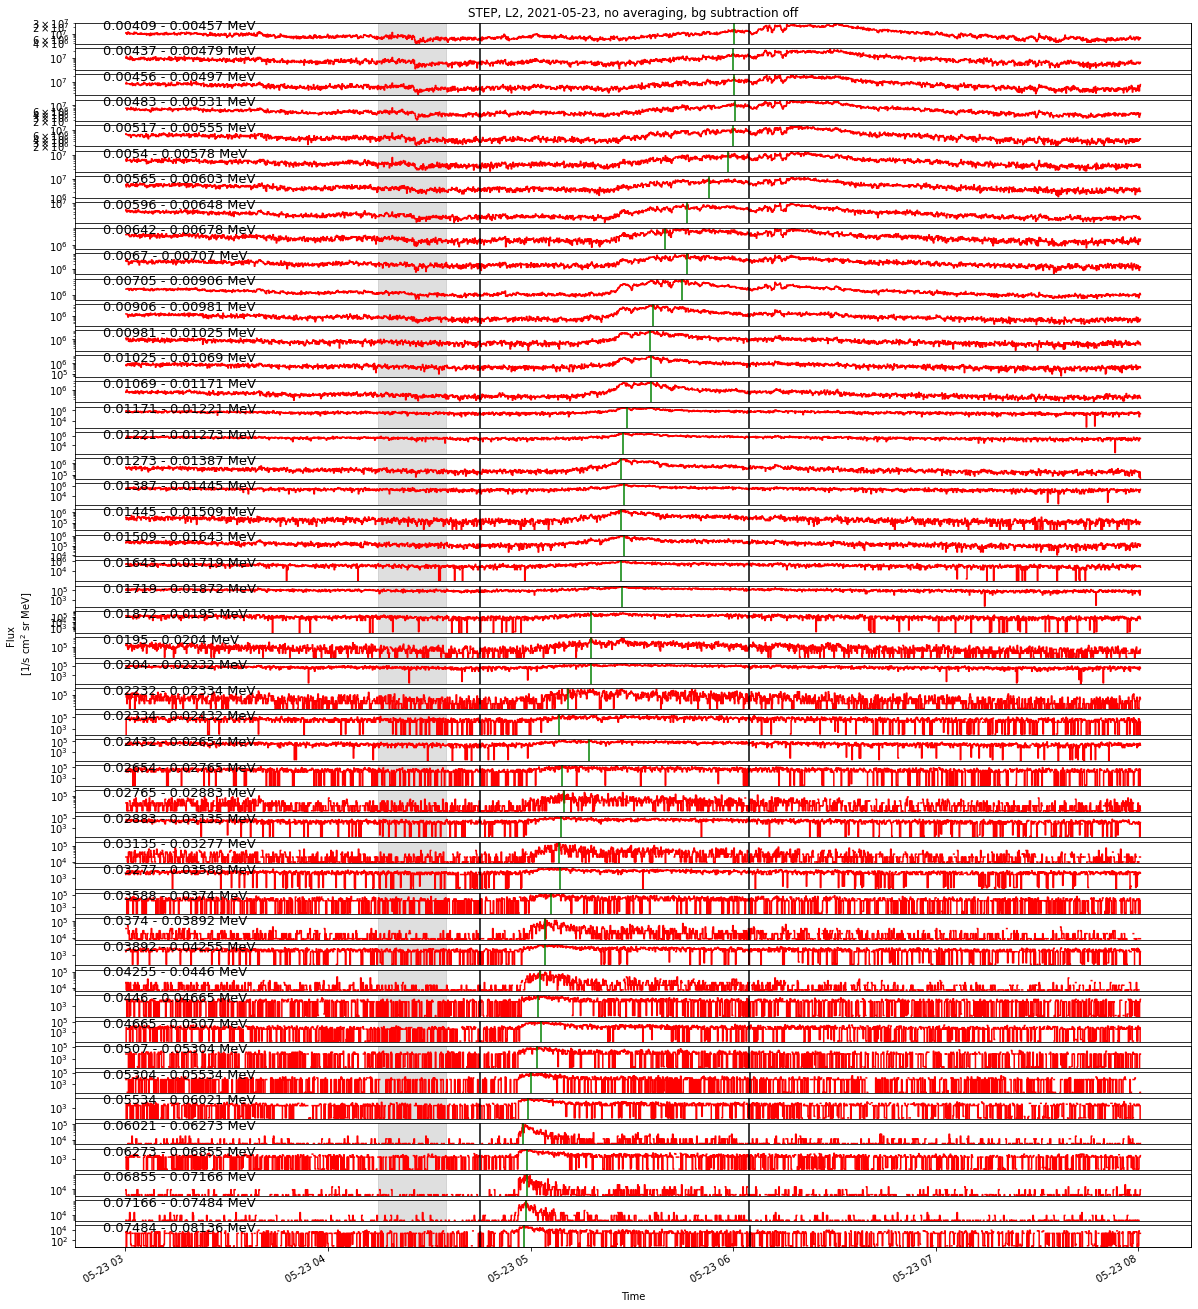

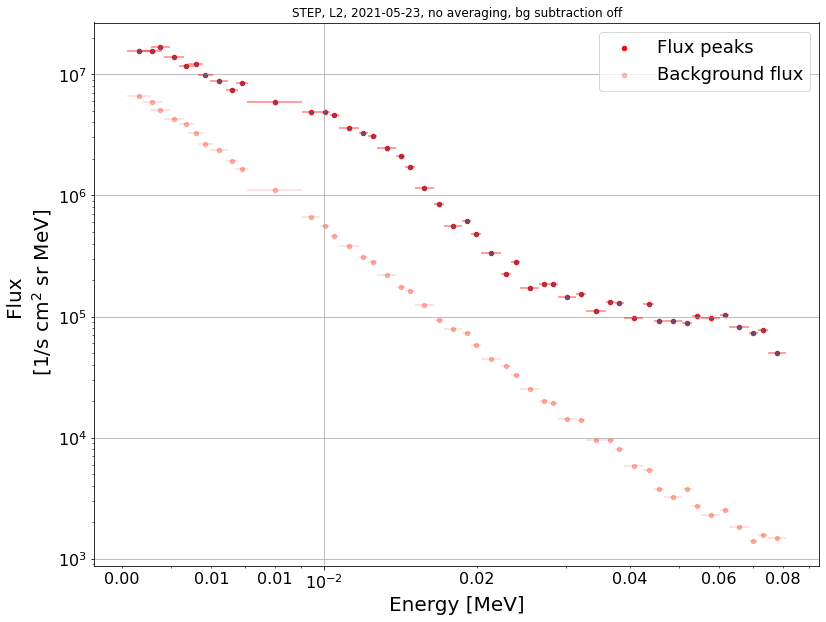

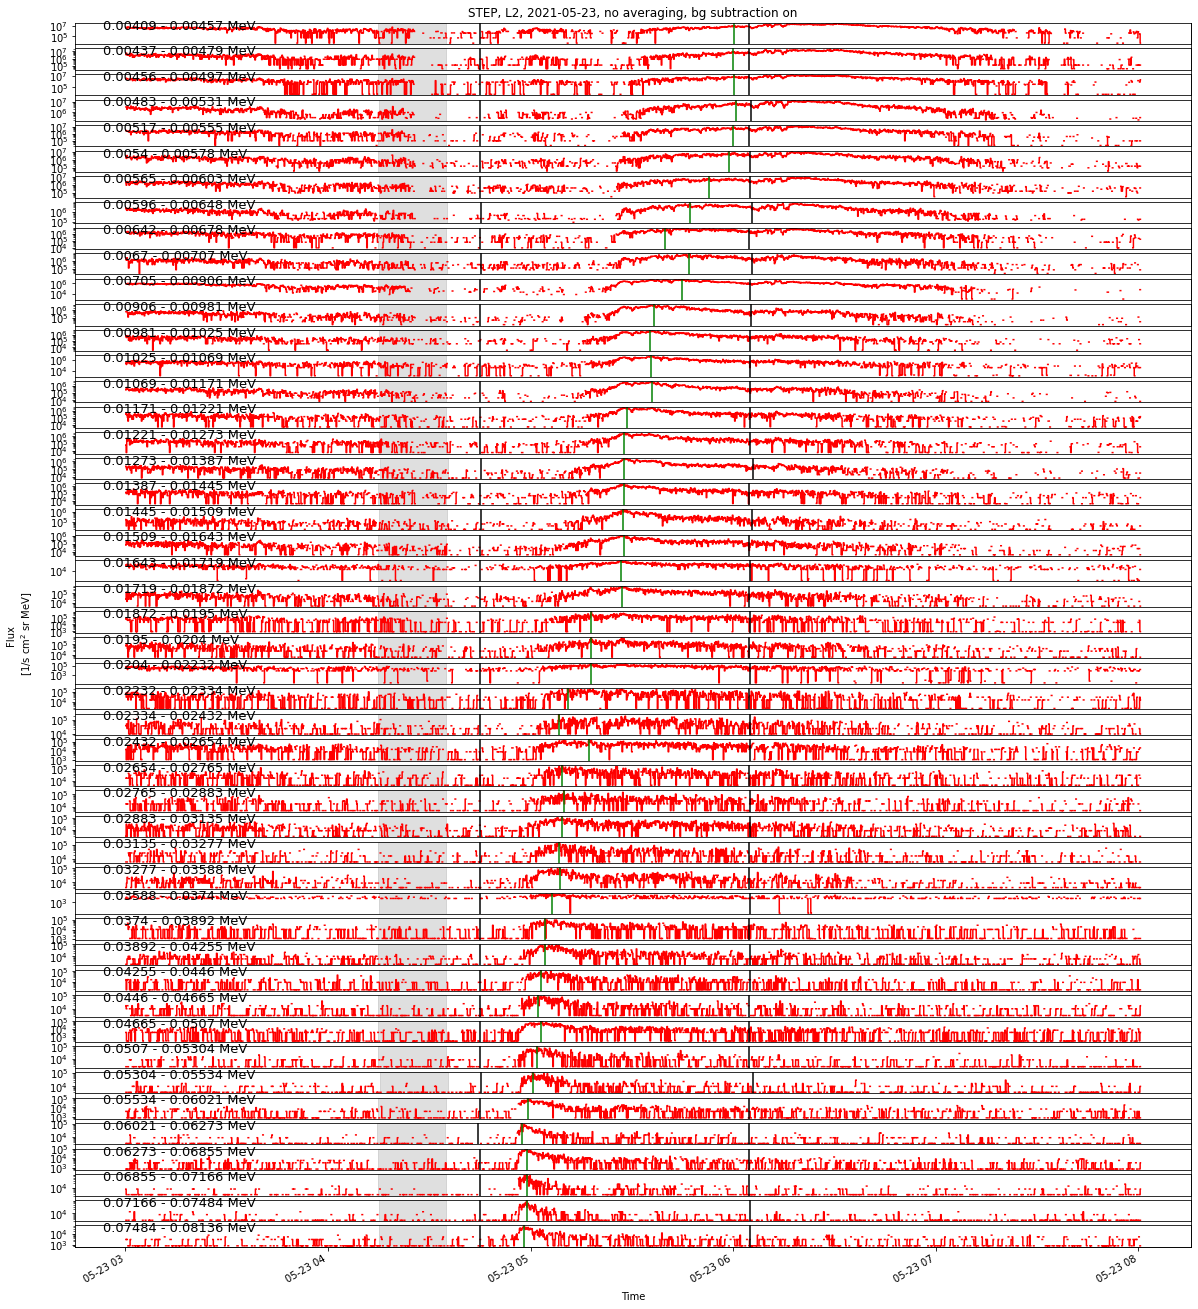

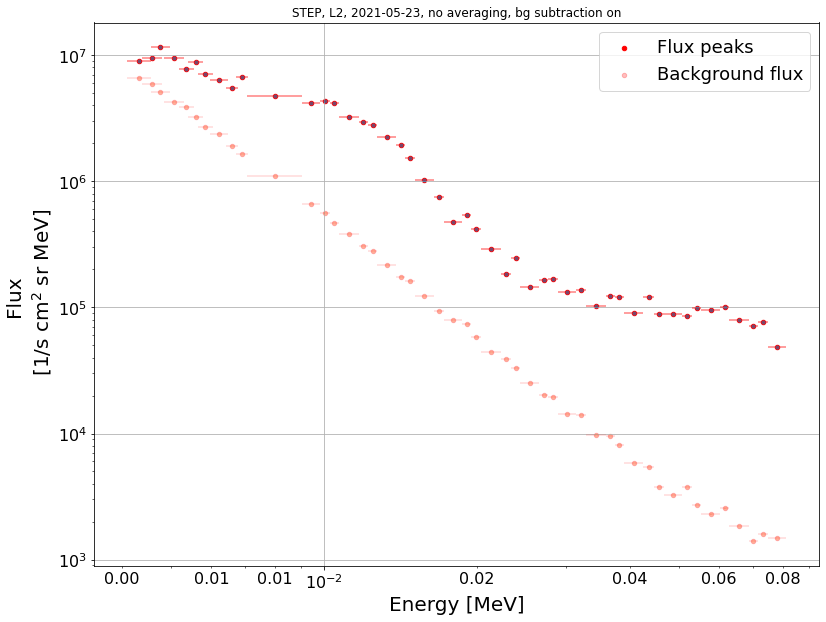

In [8]:
if(step):
    df_particles_step, energies_step = epd_load(sensor='step', viewing='sun', level='l2', startdate=start_date, enddate=end_date, path=data_path, autodownload=True)
    data_step = extract_step_data(df_particles_step, plot_start, plot_end, search_start, search_end, bg_start, bg_end, instrument='step', data_type='l2', averaging_mode=averaging_mode, averaging=averaging, masking=step_masking)
    if saving: write_to_csv(data_step, path=csv_path)
    for bg_b in [False, True]:
        plot_channels(data_step, bg_subtraction=bg_b, path=image_path, savefig=saving)
        plot_spectrum(data_step, bg_subtraction=bg_b, path=image_path, savefig=saving)